I aim to utilize data visualization to analyze and present data from NYPD shooting incidents while addressing the following questions:

Why is this task being pursued? (Goal) 
a. To demonstrate trends in NYPD shooting incidents, determining whether these incidents are increasing or decreasing over time.
b. To identify which city has the highest number of shootings.
c. To analyze the times of day and days of the week when incidents are most frequent.

How is the task conducted? (Means) 
a. Users should be able to navigate through the data.
b. Users should be able to rearrange data outputs.
c. Users should be able to compare different data outputs.

What does the task seek to learn about the data? (Characteristics) 
a. Seasonal patterns in NYPD shootings.
b. The number of incidents that resulted in fatalities.
c. Trends in NYPD shootings.
d. Locations where shooting incidents occurred.

Where does the task operate? (Target data) 
a. The data will be sourced from "NYPD_shooting_Incident_Data__Historic_.csv" https://data.cityofnewyork.us/api/views/833y-fsy8/rows.csv?accessType=DOWNLOAD"

When is the task performed? (Workflow) 
a. Not limited

Who is executing the task? (Roles) 
a. The task will be conducted by students and instructors in the Master of Science in Data Science program at the University of Colorado Boulder, as well as members of the public.

#### Import required libraries and read the dataset file

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("NYPD_data.csv")
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,231974218,08/09/2021,01:06:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.006343e+06,234270.000000,40.809673,-73.920193,POINT (-73.92019278899994 40.80967347200004)
1,177934247,04/07/2018,19:48:00,BROOKLYN,NaN,79,0.0,NaN,NaN,True,...,M,WHITE HISPANIC,25-44,M,BLACK,1.000083e+06,189064.671875,40.685610,-73.942913,POINT (-73.94291302299996 40.685609672000055)
2,255028563,12/02/2022,22:57:00,BRONX,OUTSIDE,47,0.0,STREET,GROCERY/BODEGA,False,...,(null),(null),25-44,M,BLACK,1.020691e+06,257125.000000,40.872349,-73.868233,POINT (-73.868233 40.872349)
3,25384540,11/19/2006,01:50:00,BROOKLYN,NaN,66,0.0,NaN,PVT HOUSE,True,...,U,UNKNOWN,18-24,M,BLACK,9.851073e+05,173349.796875,40.642490,-73.996912,POINT (-73.99691224999998 40.642489932000046)
4,72616285,05/09/2010,01:58:00,BRONX,NaN,46,0.0,NaN,MULTI DWELL - APT BUILD,True,...,M,BLACK,<18,F,BLACK,1.009854e+06,247502.562500,40.845984,-73.907461,POINT (-73.90746098599993 40.84598358900007)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28562 entries, 0 to 28561
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             28562 non-null  int64  
 1   OCCUR_DATE               28562 non-null  object 
 2   OCCUR_TIME               28562 non-null  object 
 3   BORO                     28562 non-null  object 
 4   LOC_OF_OCCUR_DESC        2966 non-null   object 
 5   PRECINCT                 28562 non-null  int64  
 6   JURISDICTION_CODE        28560 non-null  float64
 7   LOC_CLASSFCTN_DESC       2966 non-null   object 
 8   LOCATION_DESC            13585 non-null  object 
 9   STATISTICAL_MURDER_FLAG  28562 non-null  bool   
 10  PERP_AGE_GROUP           19218 non-null  object 
 11  PERP_SEX                 19252 non-null  object 
 12  PERP_RACE                19252 non-null  object 
 13  VIC_AGE_GROUP            28562 non-null  object 
 14  VIC_SEX               

## Data Clean-up

1. Missing data (Nulls)
2. Data Types
3. Inconsistent values
4. Duplicates
5. Outliers

In [6]:
df.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      59
Longitude                     59
Lon_Lat                       59
dtype: int64

#### 1. Missing Data (Nulls)

In [7]:
# Dropping the entire columns that are missing values and I am not interested in my analysis
df = df.drop(columns = ['LOC_OF_OCCUR_DESC','LOC_CLASSFCTN_DESC','PERP_AGE_GROUP','PERP_SEX','PERP_RACE','Lon_Lat','LOCATION_DESC'])

In [8]:
# Dropping Rows with missing values
df = df.dropna(subset = ['Latitude'])
df = df.dropna(subset = ['JURISDICTION_CODE'])

#### 2. Data Types

In [9]:
# Converting OCCUR_Date and time to proper date and time format as well as BORO and STATISTICAL_MURDER_FLAG to categorical formats

df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'], errors = 'coerce')
df['OCCUR_TIME'] = pd.to_datetime(df['OCCUR_TIME'], format = '%H:%M:%S', errors = 'coerce').dt.time
df['BORO'] = df['BORO'].astype('category')
df['STATISTICAL_MURDER_FLAG'] = df['STATISTICAL_MURDER_FLAG'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28501 entries, 0 to 28561
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   INCIDENT_KEY             28501 non-null  int64         
 1   OCCUR_DATE               28501 non-null  datetime64[ns]
 2   OCCUR_TIME               28501 non-null  object        
 3   BORO                     28501 non-null  category      
 4   PRECINCT                 28501 non-null  int64         
 5   JURISDICTION_CODE        28501 non-null  float64       
 6   STATISTICAL_MURDER_FLAG  28501 non-null  category      
 7   VIC_AGE_GROUP            28501 non-null  object        
 8   VIC_SEX                  28501 non-null  object        
 9   VIC_RACE                 28501 non-null  object        
 10  X_COORD_CD               28501 non-null  float64       
 11  Y_COORD_CD               28501 non-null  float64       
 12  Latitude                 28501 non-nu

#### 3. Inconsistant Values

In [10]:
# Checking the consistancy of categorical data types

print(df['BORO'].unique())
print(df['STATISTICAL_MURDER_FLAG'].unique())
print(df['VIC_AGE_GROUP'].unique())
print(df['VIC_SEX'].unique())
print(df['VIC_RACE'].unique())

['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']
Categories (5, object): ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']
[False, True]
Categories (2, bool): [False, True]
['18-24' '25-44' '<18' '45-64' '65+' 'UNKNOWN' '1022']
['M' 'F' 'U']
['BLACK' 'WHITE HISPANIC' 'BLACK HISPANIC' 'ASIAN / PACIFIC ISLANDER'
 'WHITE' 'UNKNOWN' 'AMERICAN INDIAN/ALASKAN NATIVE']


In [11]:
df['VIC_SEX'] = df['VIC_SEX'].replace({'M': 'Male', 'F':'Female', 'U': 'Unknown'})

In [12]:
# Check if any coordinates are out of bounds

#print(df[(df['Latitude'] < -90) | (df['Latitude'] > 90) |
 #   (df['Longitude'] < -180) | (df['Longitude'] > 180)])

#### 4. Duplicates

In [13]:
df['INCIDENT_KEY'].duplicated().sum()

6152

In [14]:
# Check for duplicate rows

df = df.drop_duplicates(subset = ['INCIDENT_KEY'], keep = 'first')

In [15]:
#df = df.drop_duplicates()

<h1 style="color:red">The purpose of using data visualization:</h1>

In this project, I am using data visualization for <b><p style="color:red"> Two main reasons:</p> </b>
- To explore the data I am working with and extract key information for my analysis, and 
- To present my findings through storytelling.

# Exploratory Data Analysis (EDA)

#### Descriptive statistics

Getting a sense of the distribution and central tendencies of the numerical columns

In [16]:
# Summary statistics

summary_stats = df.describe()

# display the summary statistics
print(summary_stats)

       INCIDENT_KEY                     OCCUR_DATE      PRECINCT  \
count  2.234900e+04                          22349  22349.000000   
mean   1.274007e+08  2014-06-10 17:58:39.781645568     65.947201   
min    9.953245e+06            2006-01-01 00:00:00      1.000000   
25%    6.612572e+07            2009-09-24 00:00:00     44.000000   
50%    9.305331e+07            2013-10-11 00:00:00     69.000000   
75%    2.015739e+08            2019-08-23 00:00:00     81.000000   
max    2.797581e+08            2023-12-29 00:00:00    123.000000   
std    7.742855e+07                            NaN     27.209352   

       JURISDICTION_CODE    X_COORD_CD     Y_COORD_CD      Latitude  \
count       22349.000000  2.234900e+04   22349.000000  22349.000000   
mean            0.333751  1.009424e+06  207616.134981     40.736487   
min             0.000000  9.149281e+05  125756.718750     40.511586   
25%             0.000000  1.000001e+06  182712.109375     40.668137   
50%             0.000000  1.0076

#### Visual distributions of data

<function matplotlib.pyplot.show(close=None, block=None)>

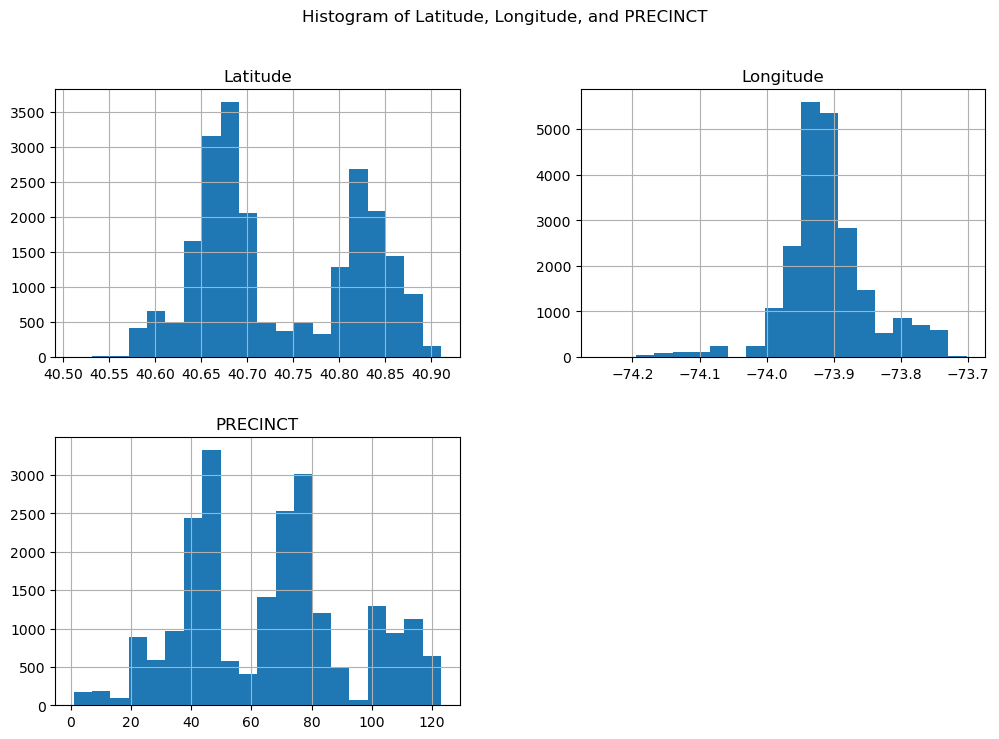

In [17]:
df[['Latitude', 'Longitude', 'PRECINCT']].hist(bins = 20, figsize = (12, 8))
plt.suptitle('Histogram of Latitude, Longitude, and PRECINCT')
plt.show

### Exploratory Data Analysis of Geographic and Precinct Distribution:

The initial analysis of the dataset reveals distinct patterns in the geographic distribution of incidents. The latitude values for incidents are predominantly concentrated between <span style="color:blue">40.50 and 40.90</span>, with the most frequent occurrences near <span style="color:blue"> 40.65 and 40.80</span>. This bimodal distribution suggests two primary clusters of incidents within these latitudinal bands, potentially pointing to specific areas or neighborhoods with higher crime rates or incidents.

The longitude values, ranging between <span style="color:blue"> -74.0 and -73.7 </span>, show a peak around -73.90, indicating that incidents are geographically concentrated within specific longitudinal areas. This concentration likely corresponds to urban areas, as the longitude range falls within the coordinates for New York City and its surrounding regions.

When analyzing the PRECINCT data, the distribution of incidents is uneven, with higher frequencies observed in precincts numbered <span style="color:blue">30-50 and 60-80</span>. This could reflect the geographical size and population density of these precincts or indicate that they are more heavily monitored or reported on. The lower frequency in precincts with higher numbers (above 100) may suggest either a less dense population in those areas or lower reporting rates.

I will explore the details further by creating visualizations for the categorical data.



#### Visualizing Categorical Data

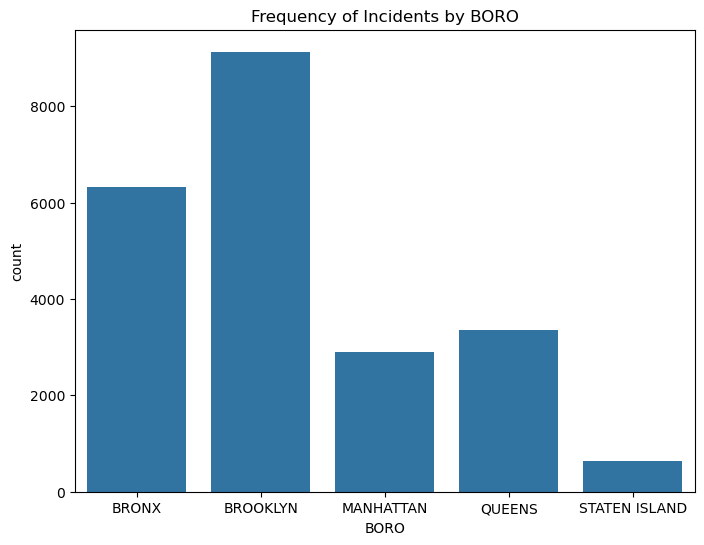

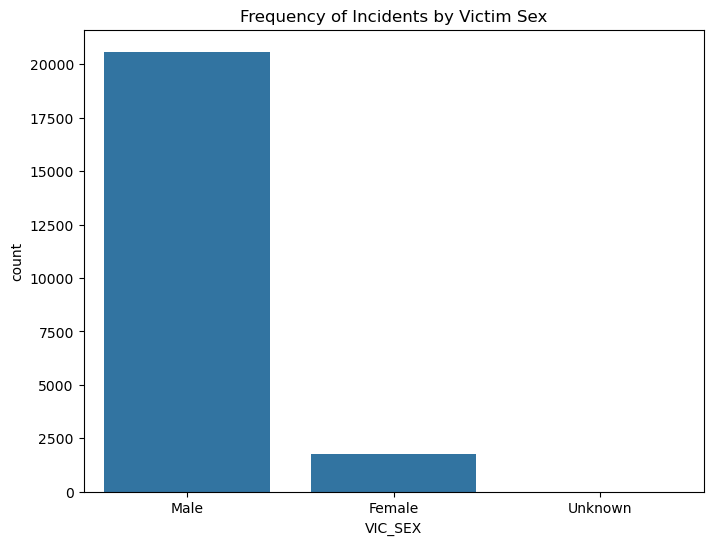

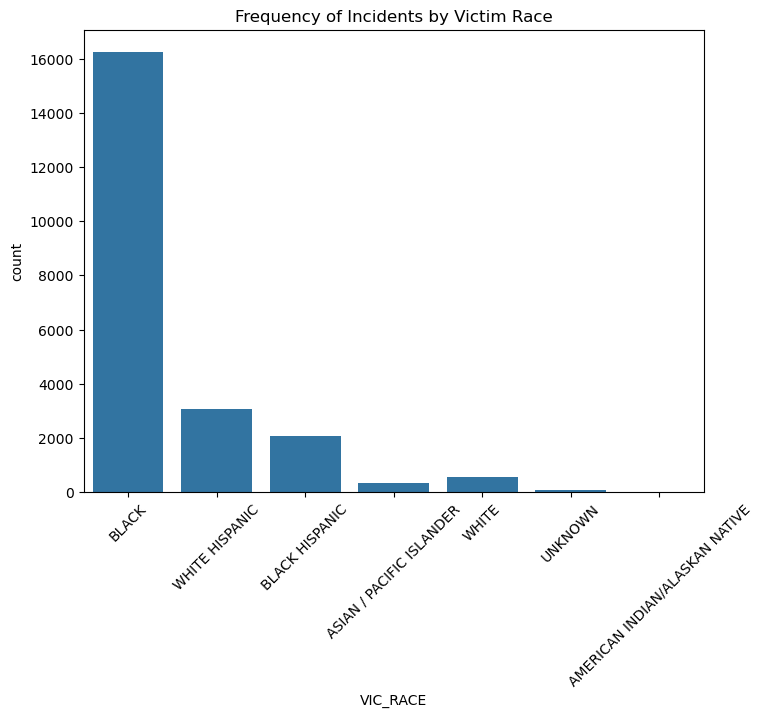

In [18]:


# Countplot for 'BORO'
plt.figure(figsize = (8, 6))
sns.countplot(x = 'BORO', data = df)
plt.title('Frequency of Incidents by BORO')
plt.show()

# Countplot for 'VIC_SEX'
plt.figure(figsize = (8, 6))
sns.countplot(x = 'VIC_SEX', data = df)
plt.title('Frequency of Incidents by Victim Sex')
plt.show()

# Countplot for 'VIC_RACE'
plt.figure(figsize = (8, 6))
sns.countplot(x = 'VIC_RACE', data = df)
plt.title('Frequency of Incidents by Victim Race')
plt.xticks(rotation = 45)
plt.show()

1. <span style="color:darkred">Black males</span> comprise more than 75% of all victims.
2. Most shootings occur in <span style="color:darkred">Brooklyn</span>, followed by the Bronx, while Staten Island has the fewest incidents.

### 1. Geospatial Mapping



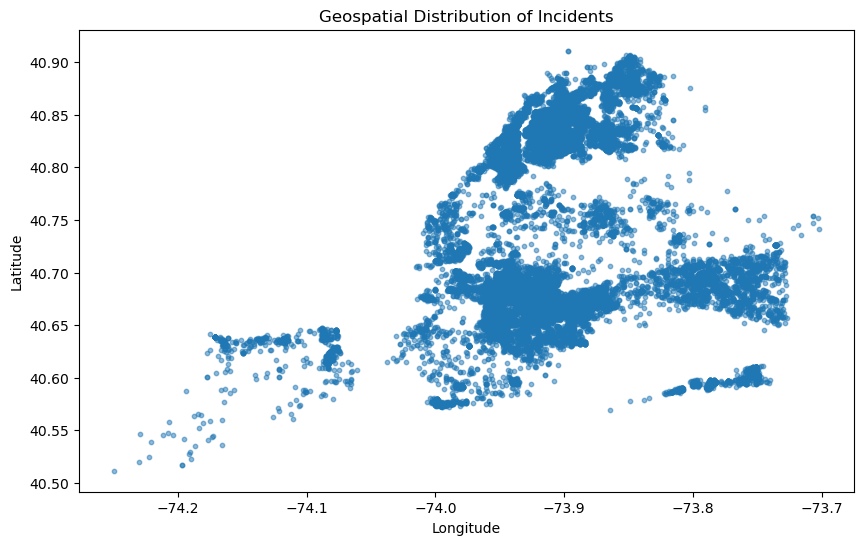

In [19]:
# Scotter plot of latitude vs. Longitude

plt.figure(figsize = (10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha = 0.5, s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Incidents')
plt.show()

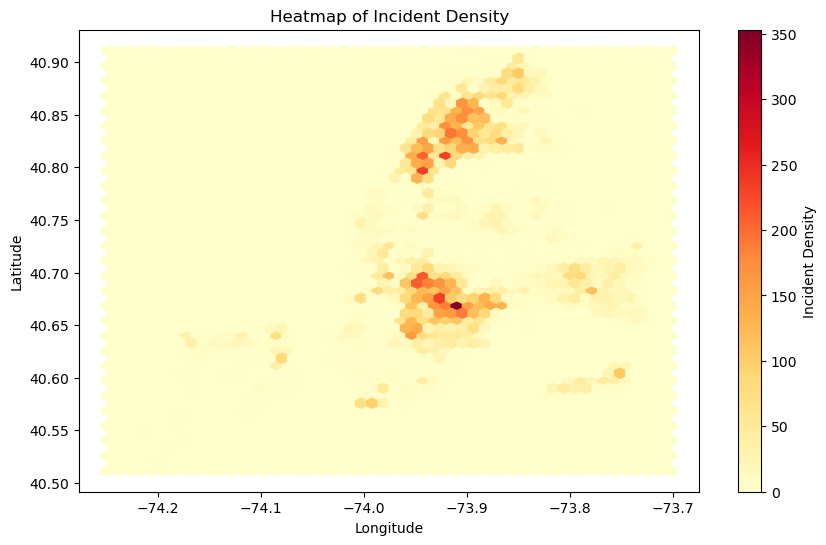

In [20]:
# Hexbin plot for better visualization of dense areas

plt.figure(figsize = (10, 6))
plt.hexbin(df['Longitude'], df['Latitude'], gridsize = 50, cmap = 'YlOrRd')
plt.colorbar(label = 'Incident Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Incident Density')
plt.show()

### 2. Precinct Analysis

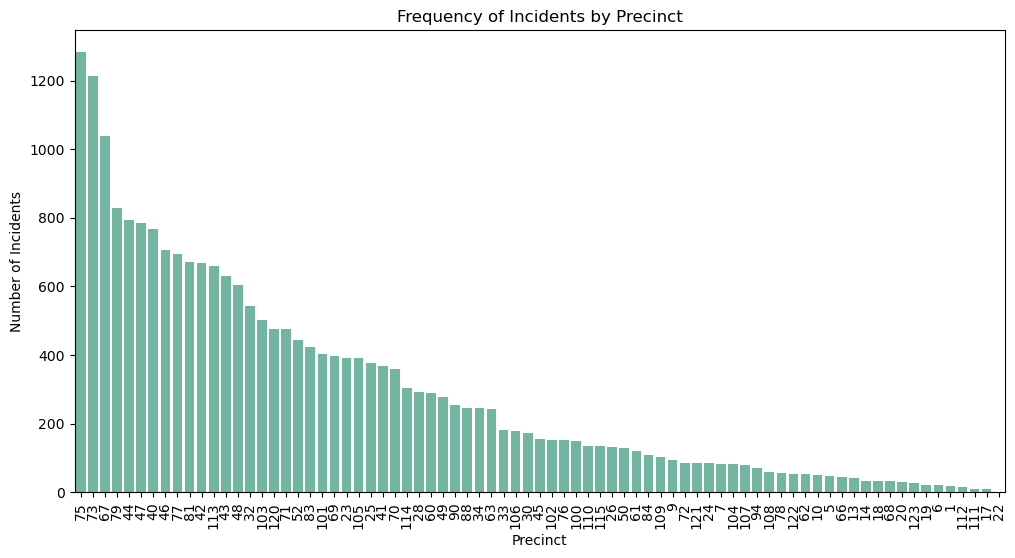

In [21]:
# Countplot for PRECINCT distribution

plt.figure(figsize = (12, 6))
sns.countplot(x = 'PRECINCT', data=df, palette = 'Set2', hue = False, legend = False, order =  df['PRECINCT'].value_counts().index)
plt.title('Frequency of Incidents by Precinct')
plt.xlabel('Precinct')
plt.ylabel('Number of Incidents')
plt.xticks(rotation = 90) # Rotate x-axis label 90 degree for better readability
plt.show()

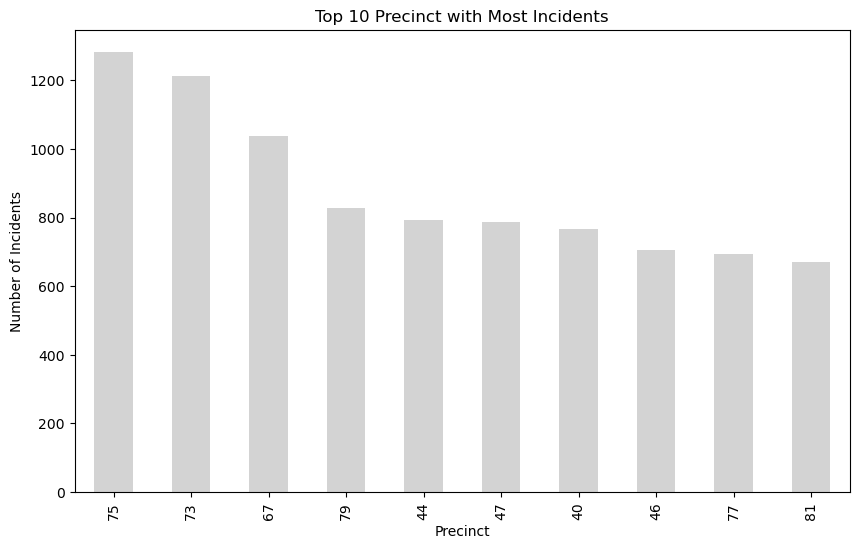

In [22]:
# Top 10 Precinct

top_precincts = df['PRECINCT'].value_counts().head(10)

plt.figure(figsize = (10, 6))
top_precincts.plot(kind = 'bar', color = 'lightgrey')
plt.title('Top 10 Precinct with Most Incidents')
plt.xlabel('Precinct')
plt.ylabel('Number of Incidents')
plt.show()

### 3. Time-based Analysis

#### Frequency of Incidents Over Time (By Year)

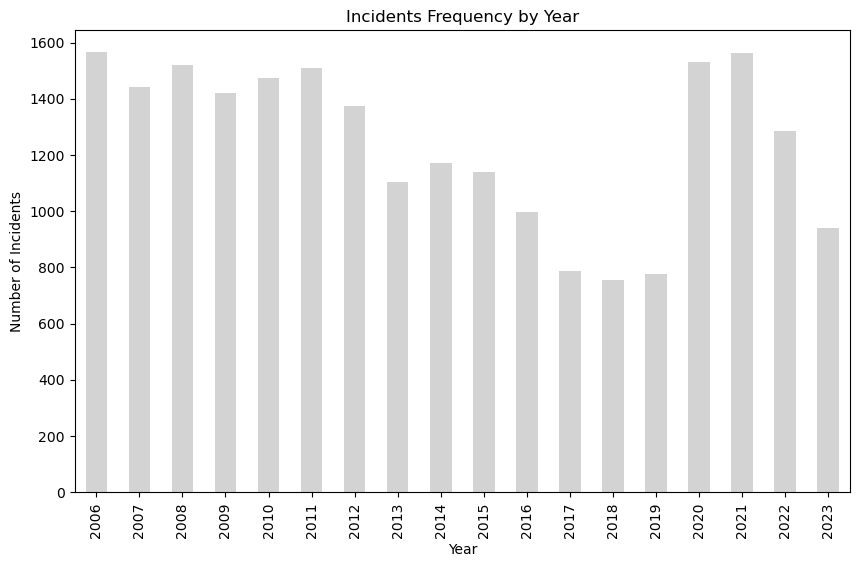

In [23]:
# Extract year from OCCUR_DATE

df['Year'] = df['OCCUR_DATE'].dt.year

# Group by Year and count the number of incidents
incidents_per_year = df.groupby('Year').size()

# Plot the frequency of incidents by Year
plt.figure(figsize = (10, 6))
incidents_per_year.plot(kind = 'bar', color = 'lightgray')
plt.title('Incidents Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

#### Frequency of Incidents Over time (By Month)

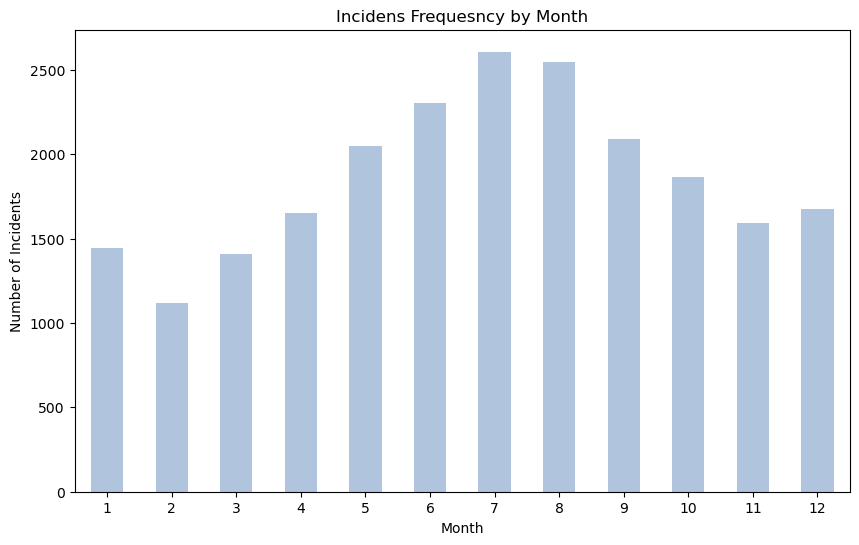

In [24]:
# Extract month from OCCUR_DATE

df['Month'] = df['OCCUR_DATE'].dt.month

# Group by month and count the number of incidents
incidents_per_month = df.groupby('Month').size()

# plot the frequency of incidents by Month
plt.figure(figsize = (10, 6))
incidents_per_month.plot(kind = 'bar', color = 'lightsteelblue')
plt.title('Incidens Frequesncy by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation = 0)
plt.show()

#### Frequency of Incidents Ovet Time (By Day)

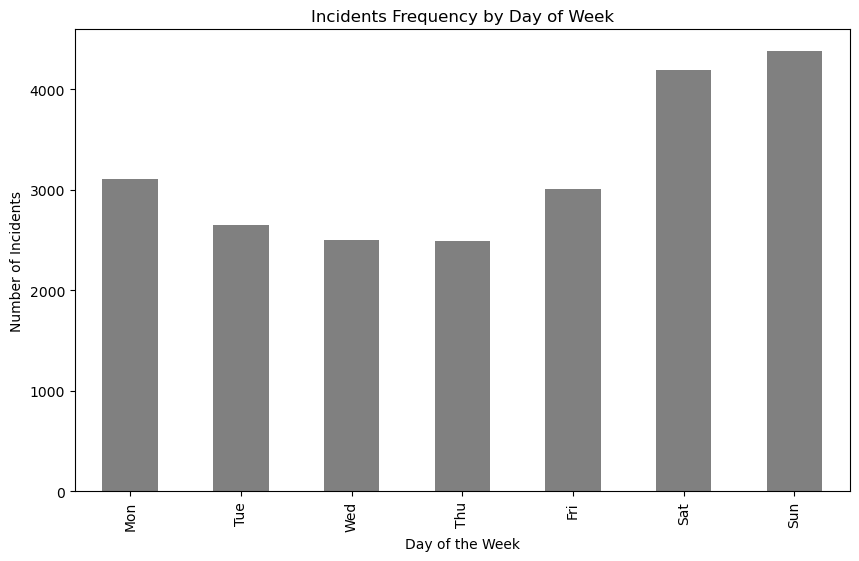

In [25]:
# Extract day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['OCCUR_DATE'].dt.dayofweek

# Group by day of the week and count the number of incidents
incidents_per_day = df.groupby('DayOfWeek').size()

# Plot thge frequency of incidents by day of the week
plt.figure(figsize = (10, 6))
incidents_per_day.plot(kind = 'bar', color = 'gray')
plt.title('Incidents Frequency by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(ticks = range(7), labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

The seasonality pattern indicates that most shootings occur in <span style="color:darkred">June, July, and August</span>, particularly on weekends.

# Storytelling


### Incidents Trend over time

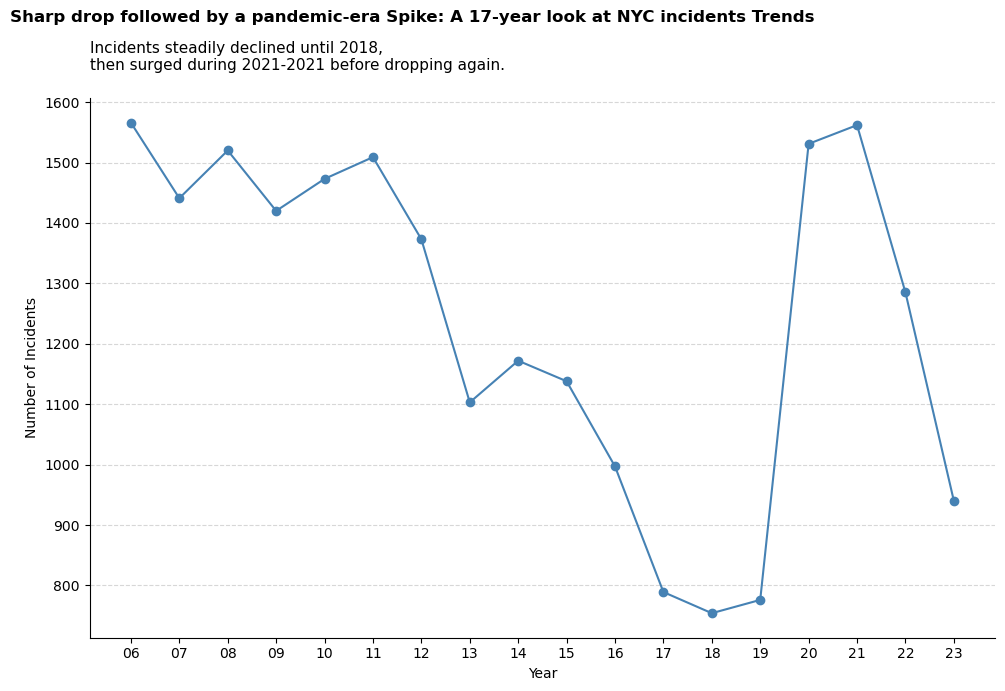

In [34]:
# # Group by year and count incidents
incidents_by_year = df['Year'].value_counts().sort_index()
plt.figure(figsize = (10, 7))

# line chart
plt.plot(incidents_by_year.index, incidents_by_year.values, marker = 'o', linestyle = '-', color = 'steelblue')

# Convert year index to 2-digit format for x-axis labels
two_digit_years = [str(year) [-2:] for year in incidents_by_year.index]
plt.xticks(ticks = incidents_by_year.index, labels = two_digit_years)

# Add a Storytelling title at the top (outside the plot area)
plt.suptitle("Sharp drop followed by a pandemic-era Spike: A 17-year look at NYC incidents Trends",
            fontsize = 12, fontweight = 'bold', x = 0.0, ha = 'left')

plt.title("Incidents steadily declined until 2018, \nthen surged during 2021-2021 before dropping again.", 
          fontsize = 11, loc = 'left', pad = 20)

# Axis labels
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

# Styling: Clear background, remover top/right borders
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Grid only along Y for readibility
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)


plt.tight_layout()
plt.show()


### Comparative analysis of incidents resulted in fatal vs. non-fatal.

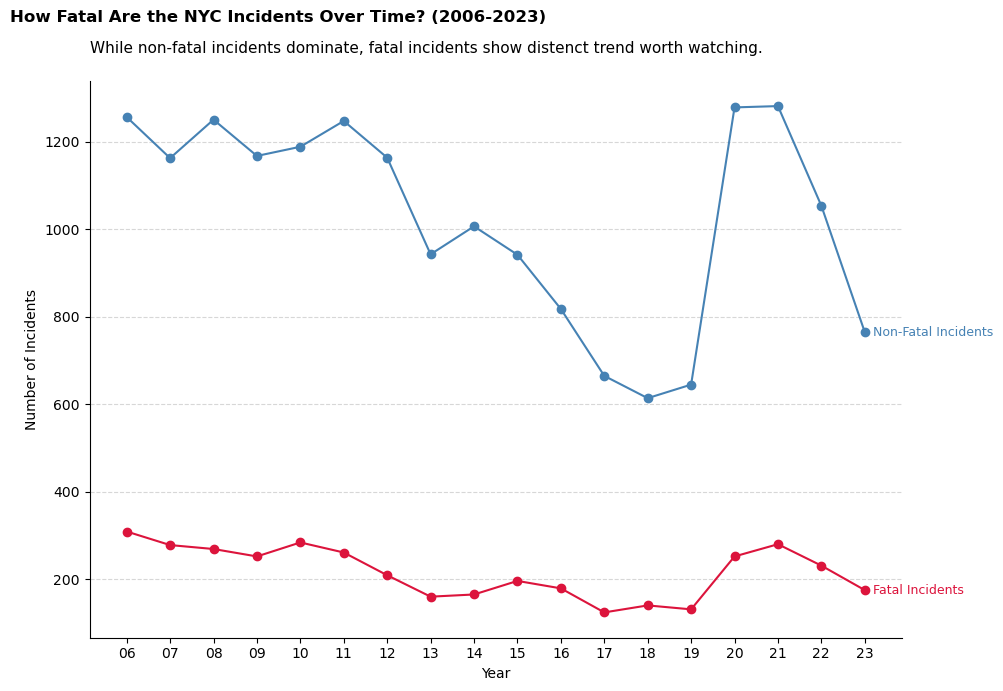

In [27]:
# Group by Year and STATISTICAL_MURDER_FLAG, then count
murder_trends = df.groupby(['Year', 'STATISTICAL_MURDER_FLAG'], observed = True).size().unstack()

# plotting
plt.figure(figsize = (10, 7))

# Two digit years label
two_digit_years = [str(y)[-2:] for y in murder_trends.index]
plt.xticks(ticks = murder_trends.index, labels = two_digit_years)

# Plot both lines
plt.plot(murder_trends.index, murder_trends[True], marker = 'o', linestyle = '-', color = 'crimson')
plt.plot(murder_trends.index, murder_trends[False], marker = 'o', linestyle = '-', color = 'steelblue')

# Add direct labels at the end of the lines
plt.text(murder_trends.index[-1] + 0.2,
         murder_trends[True].iloc[-1],
         'Fatal Incidents',
         color = 'crimson',
         va = 'center',
         fontsize = 9)

plt.text(murder_trends.index[-1] + 0.2,
         murder_trends[False].iloc[-1],
         'Non-Fatal Incidents',
         color = 'steelblue',
         va = 'center',
         fontsize = 9)

# Titles (left-aligned)
plt.suptitle("How Fatal Are the NYC Incidents Over Time? (2006-2023)",
             fontsize = 12, fontweight = 'bold', x=0.0, ha = 'left')
plt.title("While non-fatal incidents dominate, fatal incidents show distenct trend worth watching.",
          fontsize = 11, loc = 'left', pad = 20)

# Labels and Styling
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

# Clean background and borders
ax = plt.gca()
ax.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


### Compareson analysis BORO and Fatal Incidents over time


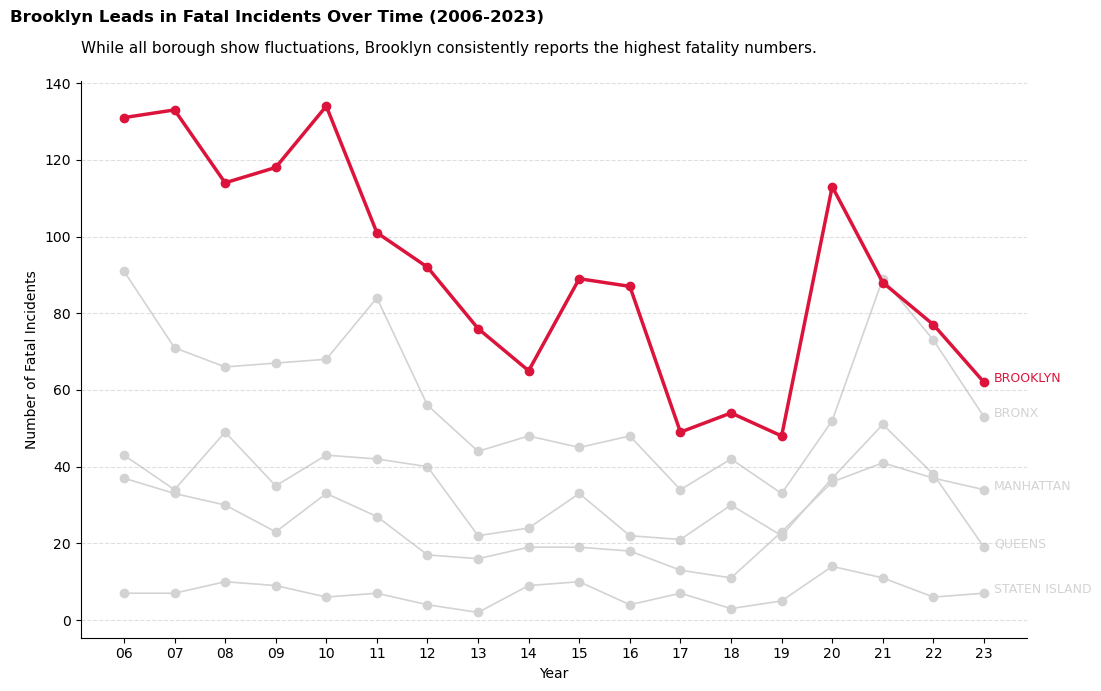

In [28]:
# Filter to Fatal Incidents Only
fatal_data = df[df['STATISTICAL_MURDER_FLAG'] == True]

# Group by Year and BORO
fatal_by_year_boro = fatal_data.groupby(['Year', 'BORO'], observed = True).size().unstack()

# Plot
plt.figure(figsize = (11, 7))

# 2-digit year labels
two_digit_years = [str(y)[-2:] for y in fatal_by_year_boro.index]
plt.xticks(ticks=fatal_by_year_boro.index, labels=two_digit_years, rotation=0)

# Set the focus Boro with highest number of Incidents
focus_boro = 'BROOKLYN'

# Loop to plot each line
for boro in fatal_by_year_boro.columns:
    if boro == focus_boro:
        plt.plot(fatal_by_year_boro.index, fatal_by_year_boro[boro],
                 marker = 'o', linestyle = '-', linewidth = 2.5, color = 'crimson', zorder = 3)
    else:
        plt.plot(fatal_by_year_boro.index, fatal_by_year_boro[boro],
                 marker = 'o', linestyle = '-', linewidth = 1.2, color = 'lightgray', zorder = 1)

# Add direct labels
# Add direct labels to the end of each line
for boro in fatal_by_year_boro.columns:
    y_val = fatal_by_year_boro[boro].iloc[-1]
    plt.text(fatal_by_year_boro.index[-1] + 0.2, y_val, boro, fontsize = 9,
             color = plt.gca().lines[fatal_by_year_boro.columns.get_loc(boro)].get_color())


# Titles (left-aligned)
plt.suptitle("Brooklyn Leads in Fatal Incidents Over Time (2006-2023)",
             fontsize = 12, fontweight = 'bold', x = 0.0, ha = 'left')
plt.title("While all borough show fluctuations, Brooklyn consistently reports the highest fatality numbers.",
          fontsize = 11, loc = 'left', pad = 20)

# Labels and styling
plt.xlabel('Year')
plt.ylabel('Number of Fatal Incidents')
plt.grid(axis = 'y',  linestyle = '--', alpha = 0.4)

# Clean visuals
ax = plt.gca()
ax.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


# Interactive Data Visualization

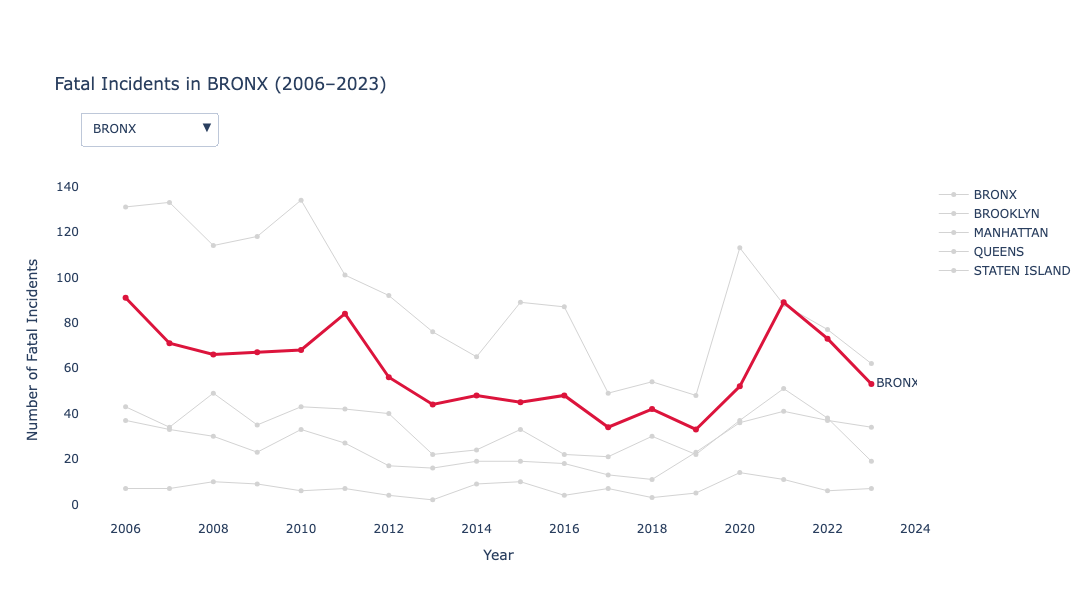

In [37]:
import plotly.graph_objects as go

# Filter for fatal incidents
fatal_data = df[df['STATISTICAL_MURDER_FLAG'] == True]

# Group by year and BORO
fatal_by_year_boro = fatal_data.groupby(['Year', 'BORO'], observed = True).size().unstack()


default_boro = 'BRONX'  # or whichever you want highlighted first

boro_list = fatal_by_year_boro.columns.tolist()
years = fatal_by_year_boro.index.tolist()

fig = go.Figure()
highlight_traces = {}
muted_traces = {}

for i, boro in enumerate(boro_list):
    # Muted trace (always visible)
    fig.add_trace(go.Scatter(
        x=years,
        y=fatal_by_year_boro[boro],
        mode='lines+markers',
        name=boro,
        line=dict(color='lightgray', width=1),
        marker=dict(size=5),
        showlegend=True
    ))

for i, boro in enumerate(boro_list):
    # Highlighted trace (only one visible at a time)
    trace_index = len(boro_list) + i  # because muted traces come first
    highlight_traces[boro] = trace_index

    fig.add_trace(go.Scatter(
        x=years,
        y=fatal_by_year_boro[boro],
        mode='lines+markers+text',
        name=f"{boro} (highlight)",
        line=dict(color='crimson', width=3),
        marker=dict(size=6),
        text=[boro if j == len(years)-1 else '' for j in range(len(years))],
        textposition='middle right',
        showlegend=False,
        visible=(boro == default_boro)
    ))

buttons = []

for boro in boro_list:
    # 5 muted traces = always visible
    # 5 highlight traces = all False except selected
    vis = [True]*len(boro_list) + [False]*len(boro_list)
    vis[highlight_traces[boro]] = True  # only show selected highlight

    buttons.append(dict(
        label=boro,
        method='update',
        args=[
            {'visible': vis},
            {'title': f'Fatal Incidents in {boro} (2006–2023)'}
        ]
    ))



fig.update_layout(
    width=1100,
    height=600,
    title=f'Fatal Incidents in {default_boro} (2006–2023)',
    xaxis_title='Year',
    yaxis_title='Number of Fatal Incidents',
    plot_bgcolor='white',
    font=dict(size=12),
    updatemenus=[dict(
        buttons=buttons,
        direction='down',
        x=0.0,
        xanchor='left',
        y=1.2,
        yanchor='top'
    )],
    margin=dict(t=180),
    hovermode='x unified'
)


## End